<a href="https://colab.research.google.com/github/jarreed0/school_stuff/blob/main/starter_bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes['rented'] = bikes['casual'] + bikes['registered']
bikes = bikes.drop(bikes.columns[[10]], axis=1)
bikes = bikes.drop(bikes.columns[[10]], axis=1)

#from datetime import datetime
#bikes['dteday'] = pd.to_datetime(bikes.dteday)
#bikes['dteday'] = pd.to_datetime(bikes['dteday'],infer_datetime_format=True)
bikes['dteday'] = pd.to_datetime(bikes['dteday'],infer_datetime_format=True)
bikes['dteday'] = bikes['dteday'].apply(lambda x: x.toordinal())

#bikes['dteday'] = int(bikes['dteday'].str.split('/')[0])*int(bikes['dteday'].str.split('/')[1])

bikes

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,rented
0,734138,1,0,0,0,1,0.81,0,3.28,3.0014,16
1,734138,1,1,0,0,1,0.80,0,2.34,1.9982,40
2,734138,1,2,0,0,1,0.80,0,2.34,1.9982,32
3,734138,1,3,0,0,1,0.75,0,3.28,3.0014,13
4,734138,1,4,0,0,1,0.75,0,3.28,3.0014,1
...,...,...,...,...,...,...,...,...,...,...,...
16632,734837,4,19,0,1,1,0.66,0,7.04,7.0010,377
16633,734837,4,20,0,1,1,0.66,0,7.04,7.0010,245
16634,734837,4,21,0,1,1,0.75,6,6.10,5.0012,183
16635,734837,4,22,0,1,1,0.75,0,6.10,5.9978,163


In [2]:
bikes.isna().value_counts()


dteday  season  hr     holiday  workingday  weathersit  hum    windspeed  temp_c  feels_like_c  rented
False   False   False  False    False       False       False  False      False   False         False     16637
dtype: int64

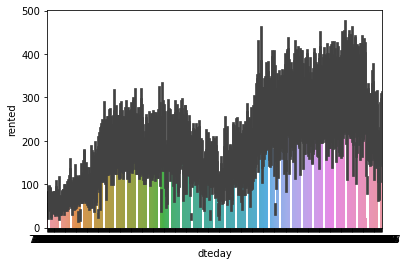

In [3]:
bikes.fillna(0)

import seaborn as sns

sns.barplot(data=bikes, x='dteday', y='rented')

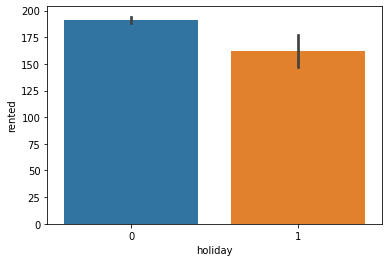

In [4]:
sns.barplot(data=bikes, x='holiday', y='rented')

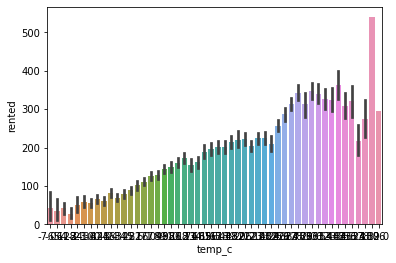

In [5]:
sns.barplot(data=bikes, x='temp_c', y='rented')

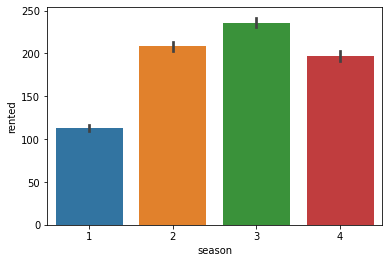

In [6]:
sns.barplot(data=bikes, x='season', y='rented')

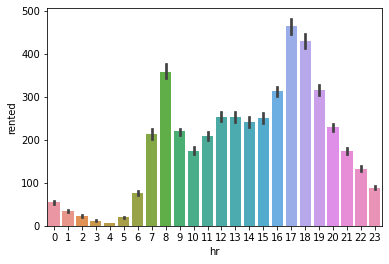

In [7]:
sns.barplot(data=bikes, x='hr', y='rented')

In [8]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        16637 non-null  int64  
 1   season        16637 non-null  int64  
 2   hr            16637 non-null  int64  
 3   holiday       16637 non-null  int64  
 4   workingday    16637 non-null  int64  
 5   weathersit    16637 non-null  int64  
 6   hum           16637 non-null  float64
 7   windspeed     16637 non-null  int64  
 8   temp_c        16637 non-null  float64
 9   feels_like_c  16637 non-null  float64
 10  rented        16637 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.4 MB


In [9]:
bikes.describe()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,rented
count,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000
mean,734488.616157,2.482058,11.547875,0.028671,0.684378,1.415580,0.624756,12.750436,15.723008,15.852141,190.477009
std,201.063398,1.085930,6.914199,0.166885,0.464777,0.637298,0.193227,8.168415,9.041349,11.322751,182.026755
min,734138.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-7.060000,-16.000000,1.000000
25%,734315.000000,2.000000,6.000000,0.000000,0.000000,1.000000,0.470000,7.000000,7.980000,5.997800,41.000000
50%,734489.000000,2.000000,12.000000,0.000000,1.000000,1.000000,0.620000,13.000000,16.440000,17.000000,143.000000
75%,734663.000000,3.000000,18.000000,0.000000,1.000000,2.000000,0.780000,17.000000,23.020000,24.999200,282.000000
max,734837.000000,4.000000,23.000000,1.000000,1.000000,4.000000,1.000000,57.000000,39.000000,50.000000,977.000000


In [10]:
X = bikes.drop(bikes.columns[[10]], axis=1)
y = bikes['rented']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=45)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(13309, 10) (13309,) (3328, 10) (3328,)


In [11]:
from sklearn import svm

#model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
#model.fit(X_train, y_train)
#prediction2=model.predict(X_test)
#print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, y_test))


from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train.values.ravel())

test_predictions = clf.predict(X_test)

X_test

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c
10440,734578,1,3,0,1,2,0.87,19,10.80,11.0006
10082,734563,1,4,0,1,1,0.88,13,14.56,15.0002
13182,734692,3,11,0,0,1,0.42,20,35.24,42.9974
998,734182,1,6,0,1,1,0.46,20,7.98,3.9980
1001,734182,1,9,0,1,1,0.37,26,10.80,11.0006
...,...,...,...,...,...,...,...,...,...,...
5567,734373,3,21,0,1,1,0.61,24,24.90,26.9990
890,734177,1,14,0,1,1,0.34,20,1.40,-4.0012
3889,734303,2,23,0,1,1,0.53,0,21.14,24.9992
2176,734232,2,13,0,1,2,0.63,28,8.92,5.9978


In [12]:
from sklearn.metrics import accuracy_score, f1_score

f1_score(y_test, test_predictions, average='weighted')

0.010072912362525197

In [13]:
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
confusion_matrix(y_test, test_predictions)

#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')

array([[ 5, 10,  5, ...,  0,  0,  0],
       [ 7,  4,  6, ...,  0,  0,  0],
       [ 4,  8,  6, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [14]:
print('Mean absolute error:' , mean_absolute_error(y_test, test_predictions))
print('Mean squared error:' , mean_squared_error(y_test, test_predictions))
print('Root mean squared error:', mean_squared_error(y_test, test_predictions, squared=False))
print('R2 score:' , r2_score(y_test, test_predictions))

Mean absolute error: 86.57451923076923
Mean squared error: 20021.552884615383
Root mean squared error: 141.4975366733124
R2 score: 0.39479587540068994


In [15]:
december_test = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv')
december_test.fillna(0)
#december_test['dteday'] = pd.to_datetime(december_test.dteday)
december_test['dteday'] = pd.to_datetime(december_test['dteday'],infer_datetime_format=True)
december_test['dteday'] = december_test['dteday'].apply(lambda x: x.toordinal())
december_test

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c
0,734838,4,0,0,0,1,0.81,0,4.22,3.9980
1,734838,4,1,0,0,1,0.81,0,4.22,3.9980
2,734838,4,2,0,0,2,0.81,0,4.22,3.9980
3,734838,4,3,0,0,2,0.81,9,4.22,1.9982
4,734838,4,4,0,0,1,0.81,6,4.22,3.0014
...,...,...,...,...,...,...,...,...,...,...
737,734868,1,19,0,1,2,0.60,11,4.22,1.0016
738,734868,1,20,0,1,2,0.60,11,4.22,1.0016
739,734868,1,21,0,1,1,0.60,11,4.22,1.0016
740,734868,1,22,0,1,1,0.56,9,4.22,1.9982
